Análise de Crédito- Partes 2 e 3<br/> Trilha 8

Parte 2

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression #trilha 2
from sklearn import tree #trilha 3
from sklearn.naive_bayes import GaussianNB #trilha 4
from sklearn.ensemble import RandomForestClassifier #trilha 5
from sklearn.ensemble import GradientBoostingClassifier #trilha 6
from sklearn.svm import SVC #trilha 7


In [5]:
#leitura do dataset processado em Credito_1.ipynb
df=pd.read_csv('german_categ_bal_full.csv')
df.head()

,Unnamed: 0,ExistA11,ExistA12,ExistA13,ExistA14,duration,credhistA30,credhistA31,credhistA32,credhistA33,credhistA34,purposeA40,purposeA41,purposeA410,purposeA42,purposeA43,purposeA44,purposeA45,purposeA46,purposeA48,purposeA49,creditamount,savingsA61,savingsA62,savingsA63,savingsA64,savingsA65,employmA71,employmA72,employmA73,employmA74,employmA75,installmentrate,statussex91,statussex92,statussex93,statussex94,otherdeb101,otherdeb102,otherdeb103,residencesince,property121,property122,property123,property124,age,otherinst141,otherinst142,otherinst143,housing151,housing152,housing153,existingcredits,job171,job172,job173,job174,peopleliable,tel191,tel192,foreig201,foreig202,classification
0,656,0,1,0,0,12,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,888,1,0,0,0,0,0,0,0,0,1,4,0,0,1,0,1,0,0,4,0,0,1,0,41,1,0,0,0,1,0,1,0,1,0,0,2,1,0,1,0,2
1,775,1,0,0,0,24,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1371,0,0,0,0,1,0,0,1,0,0,4,0,1,0,0,1,0,0,4,1,0,0,0,25,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,2
2,414,1,0,0,0,24,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1381,0,0,0,0,1,0,0,1,0,0,4,0,1,0,0,1,0,0,2,0,1,0,0,35,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,2
3,74,1,0,0,0,36,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1977,0,0,0,0,1,0,0,0,0,1,4,0,0,1,0,1,0,0,4,0,0,0,1,40,0,0,1,0,1,0,1,0,0,0,1,1,0,1,1,0,2
4,768,0,1,0,0,12,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,3617,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,4,0,0,1,0,28,0,0,1,1,0,0,3,0,0,1,0,1,0,1,1,0,1


In [6]:
df=df.sample(frac=1.0)#embaralhando...

In [7]:
y=df['classification'].copy()
df=df.drop(labels=['Unnamed: 0','classification'],axis=1)

In [8]:
y.sum()

900

In [9]:
#acertando X e o target (y)
y=np.array(y)
X=np.array(df)
for i in range(len(y)):#mau crédito=1
    if y[i]==2:y[i]=1
    else: y[i]=0
y.sum()#verificação, tem que resultar 300

300

In [10]:
#usando uma árvore de decisão para avaliar (levemente) relevâncias e performance básica no treino
tr=tree.DecisionTreeClassifier(max_depth=5,random_state=42)
tr.fit(X,y)
yetr=tr.predict(X)
print(accuracy_score(y,yetr),precision_score(y,yetr),recall_score(y,yetr))
imp=tr.feature_importances_

0.765 0.7012658227848101 0.9233333333333333


In [11]:
#ordenando relevâncias
imp_tr=[]
for i in range(len(tr.feature_importances_)):
    imp_tr.append((df.columns[i],imp[i]))
imp_tr.sort(key=lambda x:x[1],reverse=True)
imp_tr[:10]#10 features mais relevantes segundo decision tree 
#veja no anexo do e-book da trilha 8 o significado das features

[('ExistA14', 0.3642444580741693),
 ('age', 0.10005140753376775),
 ('duration', 0.06475909236968411),
 ('otherinst143', 0.05598407707229413),
 ('installmentrate', 0.04039348020919464),
 ('credhistA31', 0.03934213314590297),
 ('credhistA30', 0.03576092517878049),
 ('creditamount', 0.035346162081592844),
 ('credhistA33', 0.03255926558163481),
 ('purposeA41', 0.031644976112837946)]

In [12]:
#standardização
scaler=preprocessing.StandardScaler()
scaler.fit(X)
XS=scaler.transform(X)

In [13]:
XS[0]

array([ 1.46897745, -0.64168895, -0.24124895, -0.71241679,  0.61898419,
       -0.21282896, -0.24889135,  0.94485156, -0.32712547, -0.61330807,
       -0.58248237, -0.31767504, -0.10050378,  2.07599001, -0.59018184,
       -0.10050378, -0.16012815, -0.24509319, -0.08192319, -0.33333333,
        0.04295715, -1.30487651, -0.3485618 , -0.22536213,  4.79583152,
       -0.45524   , -0.26366402, -0.48694291, -0.6912543 , -0.43643578,
        1.68705478,  0.92110197, -0.22941573,  1.41421356, -1.06191317,
       -0.30804303,  0.31767504, -0.22536213, -0.21282896,  1.02713173,
       -0.57991628,  1.75545796, -0.68599434, -0.47380354,  1.94353453,
       -0.40067641, -0.23735633,  0.48694291,  2.04264872, -1.45773797,
       -0.38083877,  1.03948303, -0.14881703, -0.47643873,  0.76635604,
       -0.44183608, -0.42828957, -1.20789751,  1.20789751,  0.17586311,
       -0.17586311])

Parte 3

In [14]:
#split train_test para a avaliação básica
X_train, X_test, y_train, y_test = train_test_split(
    XS, y, test_size=0.33, random_state=42)


In [15]:
#instância dos algoritmos das trilhas 2 a 7...com poucos ajustes de hiperparâmetros
lr=LogisticRegression()
dt=tree.DecisionTreeClassifier(max_depth=6,random_state=42)
nb=GaussianNB()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
sv=SVC()
list_models=[(lr,'logistic Regression'),(dt,'decision trees'),(nb,'bayes gaussian'),(rf,'Random Forest'),(gb,'gradient boosting'),(sv,'Support vector machines')]

In [16]:
#Avaliação básica dos algoritmos (acurácia, prccision e recall..assuntos da trilha 1)
for modelos in list_models:
    modelos[0].fit(X_train,y_train)
    ye=modelos[0].predict(X_train)
    yet=modelos[0].predict(X_test)
    print('***************************************************')
    print(modelos[1],'\n\n')
    print('ACC PREC REC Treino  ',accuracy_score(y_train,ye),precision_score(y_train,ye),recall_score(y_train,ye))
    print('ACC PREC REC Teste   ',accuracy_score(y_test,yet),precision_score(y_test,yet),recall_score(y_test,yet))

***************************************************
logistic Regression 


ACC PREC REC Treino   0.7885572139303483 0.7772277227722773 0.7969543147208121
ACC PREC REC Teste    0.7070707070707071 0.7419354838709677 0.6699029126213593
***************************************************
decision trees 


ACC PREC REC Treino   0.8631840796019901 0.8858695652173914 0.8274111675126904
ACC PREC REC Teste    0.6717171717171717 0.69 0.6699029126213593
***************************************************
bayes gaussian 


ACC PREC REC Treino   0.7611940298507462 0.7616580310880829 0.7461928934010152
ACC PREC REC Teste    0.6818181818181818 0.7083333333333334 0.6601941747572816
***************************************************
Random Forest 


ACC PREC REC Treino   1.0 1.0 1.0
ACC PREC REC Teste    0.6919191919191919 0.723404255319149 0.6601941747572816
***************************************************
gradient boosting 


ACC PREC REC Treino   0.9477611940298507 0.9583333333333334 0.934010152

In [17]:
#Avaliação dos algoritmos com cross val k=5
for modelos in list_models:
    modelos[0]
    print('***************************************************')
    print(modelos[1],'\n\n')
    scores=cross_val_score(modelos[0], XS, y, cv=5,scoring='accuracy')
    print(sum(scores)/len(scores),scores)  

***************************************************
logistic Regression 


0.7 [0.63333333 0.65       0.75833333 0.71666667 0.74166667]
***************************************************
decision trees 


0.6449999999999999 [0.55833333 0.66666667 0.7        0.625      0.675     ]
***************************************************
bayes gaussian 


0.6483333333333333 [0.58333333 0.60833333 0.71666667 0.73333333 0.6       ]
***************************************************
Random Forest 


0.7166666666666667 [0.64166667 0.68333333 0.775      0.725      0.75833333]
***************************************************
gradient boosting 


0.6883333333333334 [0.63333333 0.66666667 0.73333333 0.68333333 0.725     ]
***************************************************
Support vector machines 


0.74 [0.64166667 0.725      0.775      0.76666667 0.79166667]


ROC CURVE Logistic Regression X Random Forest X Gradient Boosting X SVM

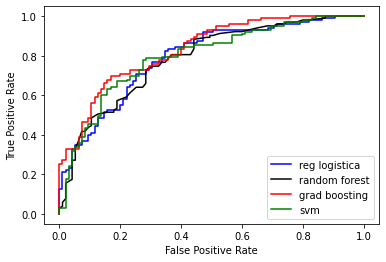

In [18]:
lr.fit(X_train,y_train)
prob_lr=lr.predict_proba(X_test)
prob_lr=prob_lr[:,1]#só prob positiva
fpr1, tpr1, th1 = roc_curve(y_test, prob_lr)
plt.plot(fpr1,tpr1,color='blue',label='reg logistica')

rf.fit(X_train,y_train)
prob_rf=rf.predict_proba(X_test)
prob_rf=prob_rf[:,1]#só prob positiva
fpr2, tpr2, th2 = roc_curve(y_test, prob_rf)
plt.plot(fpr2,tpr2,color='black',label='random forest')

gb.fit(X_train,y_train)
prob_gb=gb.predict_proba(X_test)
prob_gb=prob_gb[:,1]#só prob positiva
fpr3, tpr3, th3 = roc_curve(y_test, prob_gb)
plt.plot(fpr3,tpr3,color='red',label='grad boosting')

sv=SVC(probability=True)
sv.fit(X_train,y_train)
prob_sv=sv.predict_proba(X_test)
prob_sv=prob_sv[:,1]#só prob positiva
fpr4, tpr4, th4 = roc_curve(y_test, prob_sv)
plt.plot(fpr4,tpr4,color='green',label='svm')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [19]:
print('Reg Logística AUC:',roc_auc_score(y_test, prob_lr))
print('Random Forest AUC:',roc_auc_score(y_test, prob_rf))
print('Gradient Boosting AUC:',roc_auc_score(y_test, prob_gb))
print('SVM AUC:',roc_auc_score(y_test, prob_sv))

Reg Logística AUC: 0.7934593765968319
Random Forest AUC: 0.7859989780275932
Gradient Boosting AUC: 0.8323965252938171
SVM AUC: 0.7963208993357179
